In [1]:
import matplotlib as mpl
mpl.use('Agg')
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib as mpl
import os

In [2]:
%matplotlib inline
# set RC params
plt.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = 'true'
mpl.rcParams['ytick.minor.visible'] = 'true'
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 1.0
mpl.rcParams['xtick.major.size'] = 7.5
mpl.rcParams['ytick.major.size'] = 7.5
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

os.environ['MANPATH']="/home/paul.torrey/local/texlive/2018/texmf-dist/doc/man:$MANPATH"
os.environ['INFOPATH']="/home/paul.torrey/local/texlive/2018/texmf-dist/doc/info:$INFOPATH"
os.environ['PATH']="/home/paul.torrey/local/texlive/2018/bin/x86_64-linux:/home/paul.torrey/local/texlive/2018/texmf-dist:$PATH"

# %set_env MANPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/man:$MANPATH
# %set_env INFOPATH=/home/paul.torrey/local/texlive/2018/texmf-dist/doc/info:$INFOPATH
# %set_env PATH=/home/paul.torrey/local/texlive/2018/bin/x86_64-linux:/home/paul.torrey/local/texlive/2018/texmf-dist:$PATH
mpl.rcParams['text.usetex']        = True
# mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family']        = 'serif'
mpl.rc('font',**{'family':'sans-serif','serif':['Times New Roman'],'size':15})
mpl.rc('text', usetex=True)

In [3]:
BLUE_FMR = './blue_FMR/'

In [4]:
all_alpha_gas = []

use = {
    "EAGLE":[20,19,15,12,10, 8, 6, 5, 4],
    "TNG":[99,50,33,25,21,17,13,11,8 ],
    "ORIGINAL":[135,86 ,68 ,60 ,54 ,49 ,45 ,41 ,38 ]
}
get_idx = {
    'ORIGINAL':{135:0,
            86 :1,
            68 :2,
            60 :3,
            54 :4,
            49 :5,
            45 :6,
            41 :7,
            38 :8,
            35 :9,
            32 :10},
    'EAGLE':{28:0,
            19:1,
            15:2,
            12:3,
            10:4,
             8:5,
             6:6,
             5:7,
             4:8,
             3:9,
             2:10},
    "TNG":{99:0,
            50:1,
            33:2,
            25:3,
            21:4,
            17:5,
            13:6,
            11:7,
            8 :8,
            6 :9,
            4 :10}
}

In [5]:
all_alpha_gas = []

with h5py.File(BLUE_FMR + 'alpha_gas_values.h5', 'r') as f:
    for simulation in f:
        print(simulation)
        current = f.get(simulation)
        c_alpha = np.zeros(8+1)
        for snap in current:
            _ = int(snap.split('_')[0].replace('snap',''))
            index = get_idx[simulation][_]
            if (index < len(c_alpha)):
                #print(_,index,np.array(current.get( snap )))
                c_alpha[index] = float(np.array(current.get( snap )))
        all_alpha_gas.append(c_alpha)
        
all_uncertain_gas = []

with h5py.File(BLUE_FMR + 'alpha_uncertainty_gas_values.h5', 'r') as f:
    for simulation in f:
        print(simulation)
        current   = f.get(simulation)
        c_alpha_l = np.zeros(8+1)
        c_alpha_u = np.zeros(8+1)
        for snap in current:
            _ = int(snap.split('_')[0].replace('snap',''))
            index = get_idx[simulation][_]
            if (index < len(c_alpha)):
                #print(_,index,np.array(current.get( snap )))
                c_alpha_l[index] = list(np.array(current.get( snap )))[0]
                c_alpha_u[index] = list(np.array(current.get( snap )))[1]
        all_uncertain_gas.append( list(zip(c_alpha_l,c_alpha_u)) )
        

EAGLE
ORIGINAL
TNG
EAGLE
ORIGINAL
TNG


In [6]:
all_decrement_gas = []
with h5py.File(BLUE_FMR + 'alpha_gas_decrement.h5', 'r') as f:
    for simulation in f:
        print(simulation)
        current   = f.get(simulation)
        dec_ratio = np.zeros(8+1)
        for snap in current:
            _ = int(snap.split('_')[0].replace('snap',''))
            index = get_idx[simulation][_]
            if (index < len(c_alpha)):
                #print(_,index,np.array(current.get( snap )))
                dec_ratio[index] = np.array(current.get( snap ))[0] / np.array(current.get( snap ))[1]
        all_decrement_gas.append( dec_ratio )

EAGLE
ORIGINAL
TNG


In [7]:
all_decrement_gas

[array([1.27112741, 1.37565595, 1.24942276, 1.25400426, 1.25070367,
        1.22565329, 1.20981083, 1.20246116, 1.11862075]),
 array([1.10712416, 1.10084681, 1.13201104, 1.20770603, 1.26305897,
        1.29812272, 1.28585613, 1.3124653 , 1.40058513]),
 array([1.02117414, 1.30721482, 1.32101012, 1.34579677, 1.30575499,
        1.29690723, 1.28789424, 1.23562838, 1.25365729])]

In [8]:
all_alpha_stars = []

with h5py.File(BLUE_FMR + 'alpha_stars_values.h5', 'r') as f:
    for simulation in f:
        print(simulation)
        current = f.get(simulation)
        c_alpha = np.zeros(8+1)
        for snap in current:
            _ = int(snap.split('_')[0].replace('snap',''))
            index = get_idx[simulation][_]
            if (index < len(c_alpha)):
                #print(_,index,np.array(current.get( snap )))
                c_alpha[index] = float(np.array(current.get( snap )))
        all_alpha_stars.append(c_alpha)
        
all_uncertain_stars = []

with h5py.File(BLUE_FMR + 'alpha_uncertainty_stars_values.h5', 'r') as f:
    for simulation in f:
        print(simulation)
        current   = f.get(simulation)
        c_alpha_l = np.zeros(8+1)
        c_alpha_u = np.zeros(8+1)
        for snap in current:
            _ = int(snap.split('_')[0].replace('snap',''))
            index = get_idx[simulation][_]
            if (index < len(c_alpha)):
                #print(_,index,np.array(current.get( snap )))
                c_alpha_l[index] = list(np.array(current.get( snap )))[0]
                c_alpha_u[index] = list(np.array(current.get( snap )))[1]
        all_uncertain_stars.append( list(zip(c_alpha_l,c_alpha_u)) )

EAGLE
ORIGINAL
TNG
EAGLE
ORIGINAL
TNG


In [9]:
EAGLE_stars      = np.array(all_alpha_stars[0])
ORIGINAL_stars   = np.array(all_alpha_stars[1])
TNG_stars        = np.array(all_alpha_stars[2])

EAGLE_stars_u    = np.array(all_uncertain_stars[0])
ORIGINAL_stars_u = np.array(all_uncertain_stars[1])
TNG_stars_u      = np.array(all_uncertain_stars[2])

In [10]:
EAGLE_gas    = np.array(all_alpha_gas[0])
ORIGINAL_gas = np.array(all_alpha_gas[1])
TNG_gas      = np.array(all_alpha_gas[2])

EAGLE_gas_u    = np.array(all_uncertain_gas[0])
ORIGINAL_gas_u = np.array(all_uncertain_gas[1])
TNG_gas_u      = np.array(all_uncertain_gas[2])

EAGLE_dec    = np.array(all_decrement_gas[0])
ORIGINAL_dec = np.array(all_decrement_gas[1])
TNG_dec      = np.array(all_decrement_gas[2])

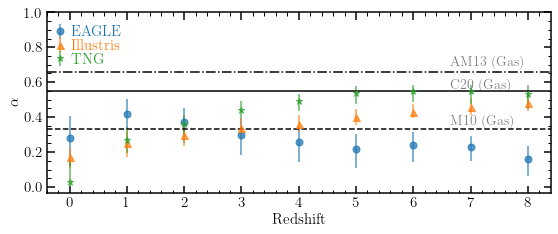

In [11]:
fig = plt.figure(figsize=(8,3.5))

max_z = 8

UNCERTAIN = True

z = [0,1,2,3,4,5,6,7,8]

EAGLE_upper = EAGLE_stars_u[:,1] - EAGLE_stars
EAGLE_lower = EAGLE_stars        - EAGLE_stars_u[:,0]

ORIGINAL_upper = ORIGINAL_stars_u[:,1] - ORIGINAL_stars
ORIGINAL_lower = ORIGINAL_stars        - ORIGINAL_stars_u[:,0]

TNG_upper = TNG_stars_u[:,1] - TNG_stars
TNG_lower = TNG_stars        - TNG_stars_u[:,0]

ms = 7
if UNCERTAIN:
    plt.errorbar( z, EAGLE_stars   , label=r'${\rm EAGLE}$'    , alpha=0.75, color='C0', yerr = [EAGLE_lower   , EAGLE_upper], linestyle='none', marker='o', markersize=ms)
    plt.errorbar( z, ORIGINAL_stars, label=r'${\rm Illustris}$', alpha=0.75, color='C1', yerr = [ORIGINAL_lower, ORIGINAL_upper], linestyle='none', marker='^', markersize=ms)
    plt.errorbar( z, TNG_stars     , label=r'${\rm TNG}$'      , alpha=0.75, color='C2', yerr = [TNG_lower     , TNG_upper], linestyle='none', marker='*', markersize=ms)
else:
    plt.scatter( z, EAGLE_stars   , label=r'${\rm EAGLE}$'    , alpha=0.75, color='C0', s=20 )
    plt.scatter( z, ORIGINAL_stars, label=r'${\rm Illustris}$', alpha=0.75, color='C1', s=20 )
    plt.scatter( z, TNG_stars     , label=r'${\rm TNG}$'      , alpha=0.75, color='C2', s=20 )

leg  = plt.legend(frameon=False,handletextpad=0, handlelength=0,
                  markerscale=0,loc='upper left',labelspacing=0.05)

if UNCERTAIN:
    # get handles
    handles, labels = plt.gca().get_legend_handles_labels()
    # remove the errorbars
    handles = [h[0] for h in handles]
    # use them in the legend
    leg = plt.legend(frameon=False,handletextpad=0.75, handlelength=0,labelspacing=0.01,
                 loc='upper left')

lCol = ['C0','C1','C2']
for n, text in enumerate( leg.texts ):
    text.set_color( lCol[n] )

    
plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'$\alpha$')

plt.axhline(0.33 ,color='k',linestyle='--')
plt.text(0.8,0.375,r'${\rm M10 ~(Gas)}$',fontsize=14,alpha=0.5,transform=plt.gca().transAxes)
plt.axhline(0.66 ,color='k',linestyle='-.')
plt.text(0.8,0.7,r'${\rm AM13 ~(Gas)}$',fontsize=14,alpha=0.5,transform=plt.gca().transAxes)
plt.axhline(0.55 ,color='k',linestyle='solid')
plt.text(0.8,0.575,r'${\rm C20~(Gas)}$',fontsize=14,alpha=0.5,transform=plt.gca().transAxes)
ymin, _ = plt.ylim()

plt.ylim(ymin,1)

plt.tight_layout()

# plt.text(0.3,0.8,r'$5\%~{\rm  uncertainty}$', transform=plt.gca().transAxes )

plt.savefig(BLUE_FMR + "Stars_Comparison.pdf")
plt.show()

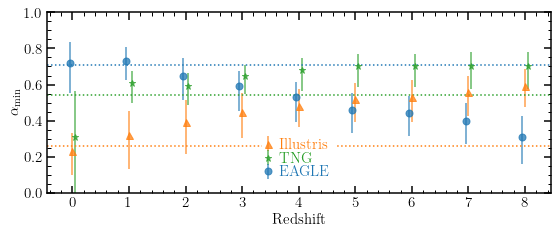

In [16]:
fig = plt.figure(figsize=(8,3.5))

max_z = 8


ORIGINAL_COMBINED = 0.26
TNG_COMBINED      = 0.54
EAGLE_COMBINED    = 0.71

UNCERTAIN = True
COMBINED  = True

z = np.array([0,1,2,3,4,5,6,7,8])

EAGLE_upper = EAGLE_gas_u[:,1] - EAGLE_gas
EAGLE_lower = EAGLE_gas        - EAGLE_gas_u[:,0]

ORIGINAL_upper = ORIGINAL_gas_u[:,1] - ORIGINAL_gas
ORIGINAL_lower = ORIGINAL_gas        - ORIGINAL_gas_u[:,0]

TNG_upper = TNG_gas_u[:,1] - TNG_gas
TNG_lower = TNG_gas        - TNG_gas_u[:,0]

ms=7
if UNCERTAIN:
    plt.errorbar( z+0.00, ORIGINAL_gas, label=r'${\rm Illustris}$', alpha=0.75, color='C1', yerr = [ORIGINAL_lower, ORIGINAL_upper], linestyle='none', marker='^',markersize=ms)
    plt.errorbar( z+0.05, TNG_gas     , label=r'${\rm TNG}$'      , alpha=0.75, color='C2', yerr = [TNG_lower     , TNG_upper], linestyle='none', marker='*',markersize=ms)
    plt.errorbar( z-0.05, EAGLE_gas   , label=r'${\rm EAGLE}$'    , alpha=0.75, color='C0', yerr = [EAGLE_lower   , EAGLE_upper], linestyle='none', marker='o',markersize=ms)
else:
    plt.scatter( z+0.1, EAGLE_gas   , label=r'${\rm EAGLE}$'    , alpha=0.75, color='C0', s=20 )
    plt.scatter( z+0.0, ORIGINAL_gas, label=r'${\rm Illustris}$', alpha=0.75, color='C1', s=20 )
    plt.scatter( z-0.1, TNG_gas     , label=r'${\rm TNG}$'      , alpha=0.75, color='C2', s=20 )
    
    
leg  = plt.legend(frameon=True,handletextpad=0, handlelength=0,
                  markerscale=0,loc='lower right',labelspacing=0.05)
lCol = ['C1','C2','C0']
for n, text in enumerate( leg.texts ):
    text.set_color( lCol[n] )
if UNCERTAIN:
    # get handles
    handles, labels = plt.gca().get_legend_handles_labels()
    # remove the errorbars
    handles = [h[0] for h in handles]
    # use them in the legend
    leg = plt.legend(frameon=True,handletextpad=0.75, handlelength=0,labelspacing=0.01,
                 loc='lower center')
    for n, text in enumerate( leg.texts ):
        text.set_color( lCol[n] )
leg.get_frame().set_alpha(1.0)
leg.get_frame().set_edgecolor('white')
if COMBINED:
    plt.axhline( EAGLE_COMBINED   , color='C0', linestyle=':', label=r'${\rm EAGLE}$'     )
    plt.axhline( ORIGINAL_COMBINED, color='C1', linestyle=':', label=r'${\rm Illustris}$' )
    plt.axhline( TNG_COMBINED     , color='C2', linestyle=':', label=r'${\rm TNG}$'       )
    
plt.scatter( np.arange(0,9), np.ones(9), color='white' )

    
plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'$\alpha_{\rm min}$')

# plt.axhline(0.33 ,color='k',linestyle='--',alpha=0.5)
# plt.text(0.765,0.35,r'${\rm M10}$',fontsize=14,alpha=0.5,transform=plt.gca().transAxes)
# plt.axhline(0.66 ,color='k',linestyle='-.',alpha=0.5)
# plt.text(0.75,0.675,r'${\rm AM13}$',fontsize=14,alpha=0.5,transform=plt.gca().transAxes)
# plt.axhline(0.55 ,color='k',linestyle='solid',alpha=0.5)
# plt.text(0.765,0.565,r'${\rm C20}$',fontsize=14,alpha=0.5,transform=plt.gca().transAxes)
ymin, _ = plt.ylim()

plt.ylim(0,1)

plt.tight_layout()

# plt.text(0.3,0.8,r'$5\%~{\rm  uncertainty}$', transform=plt.gca().transAxes )

plt.savefig(BLUE_FMR + "Gas_Comparison.pdf",bbox_inches='tight' )
plt.show()

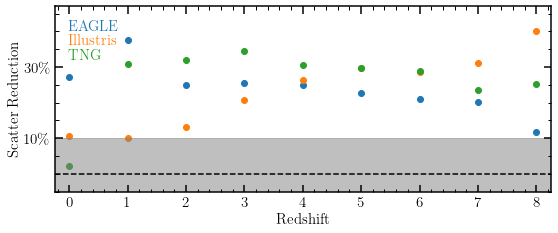

In [13]:
fig = plt.figure(figsize=(8,3.5))

max_z = 8

UNCERTAIN = True

z = np.arange(0,max_z+1,1)

plt.scatter(z, EAGLE_dec    , label=r'${\rm EAGLE}$'     , color='C0')
plt.scatter(z, ORIGINAL_dec , label=r'${\rm Illustris}$' , color='C1')
plt.scatter(z, TNG_dec      , label=r'${\rm TNG}$'       , color='C2')

leg  = plt.legend(frameon=False,handletextpad=0, handlelength=0,
                  markerscale=0,loc='upper left',labelspacing=0.05)

lCol = ['C0','C1','C2','k']
for n, text in enumerate( leg.texts ):
    text.set_color( lCol[n] )

plt.xlabel(r'${\rm Redshift}$')
plt.ylabel(r'${\rm Scatter~Reduction}$')

loc, labels = plt.yticks()

newlabels = [ r'$%s$' %round(l*100 - 100) + r'$\%$' for l in loc[1::2]]

plt.yticks(ticks=loc[1::2],labels=newlabels)

plt.axhline(1.0,color='k',linestyle='--')

plt.ylim( 0.95, 1.05*np.max(all_decrement_gas) )

plt.xlim(-0.25,8.25)

width = 0.1

plt.fill_between( np.arange(-5,10), 1 + width, 0, color='gray', alpha=0.5 )

plt.tight_layout()

plt.savefig(BLUE_FMR + "Gas_decrement.pdf")
plt.show()

# Bootstrap

In [55]:
bootstrap_dir = './blue_FMR/bootstrap/'

def get_all_arr(WHICH_SIM, Dir):
    
    WHICH_SIM = WHICH_SIM.upper()
    
    means = np.load( Dir + '%s_mean.npy' %WHICH_SIM )
    low   = means - np.load( Dir + '%s_low.npy'  %WHICH_SIM ) 
    high  = np.load( Dir + '%s_high.npy' %WHICH_SIM ) - means
    
    return means, low, high

In [56]:
ill   = get_all_arr("original",bootstrap_dir)
tng   = get_all_arr("tng",bootstrap_dir)
eagle = get_all_arr("eagle",bootstrap_dir)

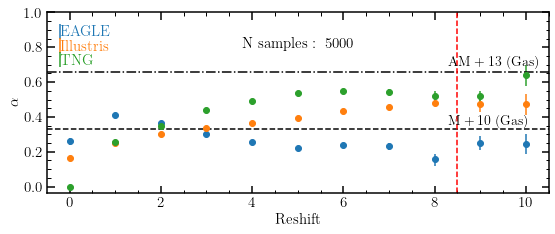

In [59]:
fig = plt.figure(figsize=(8,3.5))

zs = np.arange(0,11)
means = [eagle[0],ill[0],tng[0]]
lows  = [eagle[1],ill[1],tng[1]]
highs = [eagle[2],ill[2],tng[2]]

names = [r"${\rm EAGLE}$", r"${\rm Illustris}$", r'${\rm TNG}$']

for index in range(len(means)):
    plt.errorbar( zs, means[index], yerr=[lows[index],highs[index]], label=names[index], linestyle='none', marker='o' )
    
plt.xlabel(r'${\rm Reshift}$')
plt.ylabel(r'$\alpha$')

plt.axhline(0.33 ,color='k',linestyle='--')
plt.text(0.8,0.375,r'${\rm M+10 ~(Gas)}$',fontsize=14,alpha=1,transform=plt.gca().transAxes)
plt.axhline(0.66 ,color='k',linestyle='-.')
plt.text(0.8,0.7,r'${\rm AM+13 ~(Gas)}$',fontsize=14,alpha=1,transform=plt.gca().transAxes)
ymin, _ = plt.ylim()

plt.ylim(ymin,1)

plt.tight_layout()
leg  = plt.legend(frameon=False,handletextpad=0, handlelength=0,
                  markerscale=-1,loc='upper left',labelspacing=0.05)
lCol = ['C0','C1','C2']
for n, text in enumerate( leg.texts ):
    text.set_color( lCol[n] )
plt.axvline(8.5, color='red',linestyle='--')
plt.text( 0.5,0.8,r'${\rm N~samples:~} 5000$', transform=plt.gca().transAxes,ha='center' )
plt.savefig(BLUE_FMR + "Stars_bootstrap.pdf")
# plt.show()